# Estimating the U.K. Separated Plutonium Stockpile 

Authors: Christopher Fichtlscherer, Friederike Frieß, Moritz Kütt

Additional material for the publication __Assessing the PRISM Reactor as a Disposition Option for the British Plutonium Stockpile__ by Christopher Fichtlscherer, Friederike Frieß, Moritz Kütt (published in the Science & Global Security -
The Technical Basis for Arms Control, Disarmament, and Nonproliferation Initiatives)


___

###### Python Packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import matplotlib.patches as mpatches
import os

###### Basics

In [2]:
startyear = 1960
endyear = 2100
years = endyear - startyear + 1

___

## Introduction

With a possible civilian breeder program in mind, the UK started to develop a reprocessing program in the 1960's.
At the time, uranium resources where considered to be scarce compared to the needs for a large scale, world wide use of nuclear power.
It was anticipated that the plutonium would be needed as startup fuel in fast reactors operating in a closed nuclear fuel cycle, where they would "breed" more plutonium.
Later, uranium resource estimates were revised showing that much more uranium was available, and breeder programs in most countries were abandoned, often due to technical and economical difficulties.

The first large reprocessing plant, called B205, was opend in 1964.
The plant was specifically designed to reprocess spent fuel from UK's first generation of reactors was based on the MAGNOX design, named after the magnesium oxide cladding material for the metallic fuel.
The first to start was the reactor in Calder Hall in 1956. Its early main purpose was weapons plutonium production.
A total of 26 reactor blocks at 11 different sites were constructed during the 1960ies.
It has been UK government policy that all MAGNOX fuel should be reprocessed.
All of them are shutdown today, the longest remaining reactors were those at the Wylfa site.
Even after plutonium demands disappeared, a reason frequently given in favor of reprocessing is that MAGNOX fuel corrodes quickly in water, hence long-term storage in spent fuel pools is unfeasible.
Dry storage, however, would have been an option (https://royalsociety.org/~/media/Royal_Society_Content/policy/publications/1998/10168.pdf). 
According to recent estimates by the Nuclear Decomissioning Authority, the B205 plant will receive last fuel discharges from reactors in 2019 and stop operation in 2020, after the last fuel has been reprocessed (https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/695245/NDA_Business_Plan_2018_to_2021.pdf).

UK's second generation of reactors, "Advanced Gas-cooled reactors" (AGR), came online starting in 1976, and several reactors of this type are operating until today.
The reactors use oxide fuel, which can not be reprocessed at the B205 plant.
To reprocess AGR fuel and with a prospective market of foreign oxide fuel to be reprocessed in the UK, the government decided in 1978 to build another reprocessing facility, THORP ("Thermal Oxide Reprocessing Plant").
When THORP started operation in 1994, the operators had secured contracts to reprocess approx. 10,000 tons of spent fuel, more than half of that from foreign sources (http://fissilematerials.org/library/rr05.pdf).
Parts of the AGR spent fuel have been reprocessed in the THORP reprocessing plant.
From the beginning, the plant's operating figures lagged behind operators expecations and promises.
In 2005, the plant suffered a massive leak leading to a nearly 3 year-long closure.
It is currently planned to shutdown THORP in 2018 (https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/695245/NDA_Business_Plan_2018_to_2021.pdf).
With the closure of the two big reprocessing facilities, there should be no addition of material to the UK stockpile after 2020.

This document estimates the development of the stockpile, including the change of the isotopic composition over time due to decay.


### Summary of calculation

For the time prior 1996, it is assumed that only plutonium from reprocessing MAGNOX fuel is added to the UK owned stockpile.
Plutonium arisings from British MAGNOX fuel until 1995 are listed in \[David Albright, Frans Berkhout, and William Walker, Plutonium and Highly Enriched Uranium 1996 - World Inventories, Capabilities and Policies\], Table C.1.
                                                                                                              
From 1996 onwards, the main source are the statements by the government as part of the INFCIRC 549 agreement. In recent years, the UK has taken over ownership for plutonium on British soil that was produced by reprocessing foreign spent fuel. 

To split the total number of british separated plutonium by reactor type, first the amount originating from ownership changes of formerly foreign plutonium was identified.
Secondly, the plutonium resulting from spent MAGNOX fuel reprocessing was calculated based on throughput figures for the B205 plant.
Lastly, remaining plutonium after substraction of swaps and the amount with MAGNOX origin is assumed to be plutonium resulting from reprocessing of AGR spent fuel.

___

## Collecting Data from External Sources

### Explicit values for Plutonium Production

#### Until 1995

For the years until 1995, \[David Albright, Frans Berkhout, and William Walker, Plutonium and Highly Enriched
Uranium 1996 - World Inventories, Capabilities and Policies\] provides comprehensive data. Used here is the data provided in table C.1, pp. 479-480. According to the text, it is based on fuel discharge figures from sources, mean burnup values calculated by Albright et al. (p. 476) and plutonium production calculated by: 

\begin{align*}
pu_{tot}= 0.9235 B^{0.6946}
\end{align*}

According to the caption of Table C.1 in the book, a 5% production loss is assumed. However, values can only be reproduced using different production losses: 5% for 1966-1974, 3% for 1976-1983, 2% for 1986-1995, 6% for 1965, 3.4% for 1975, 3.3% for 1984 and 2.4% for 1985. (In this case, all values are calculated with the equation above, not including other possible assumptions). For the following calculations, just the plutonium production as estimated in the table was used.

Data is organized as a list of lists of the following type: `[<year>, <pu-production>, <avg-burnup>, <fuel-throughput>]`. Pu-production is in kg, avg-burnup in MWd/t, fuel-throughput in t.

In [3]:
albright205 = np.array([(1965, 141, 913, 173),
               (1966, 417, 1436, 370),
               (1967, 561, 1500, 483),
               (1968, 944, 1909, 688),
               (1969, 1331, 2000, 938),
               (1970, 1847, 2391, 1150),
               (1971, 1865, 2500, 1125),
               (1972, 705, 2500, 425),
               (1973, 930, 2950, 500),
               (1974, 1341, 3000, 713),
               (1975, 2117, 3407, 1013),
               (1976, 1550, 3500, 725),
               (1977, 2081, 3917, 900),
               (1978, 2170, 4000, 925),
               (1979, 1984, 4145, 825),
               (1980, 2102, 4200, 866),
               (1981, 2372, 4353, 953),
               (1982, 2506, 4324, 1012),
               (1983, 2525, 4225, 1036),
               (1984, 1782, 3438, 846),
               (1985, 1947, 3942, 833),
               (1986, 1889, 3598, 858),
               (1987, 1968, 4275, 794),
               (1988, 2092, 4751, 783),
               (1989, 2552, 4879, 938),
               (1990, 2102, 4968, 763),
               (1991, 1688, 4559, 651),
               (1992, 1690, 4400, 667),
               (1993, 2544, 4233, 1032),
               (1994, 2314, 3988, 978),
               (1995, 2136, 3975, 905)],
                       dtype=[('year','i4'),
                              ('pu-production', 'i4'),
                              ('avg-burnup', 'i4'),
                              ('fuel-throughput', 'i4')])

Average Burnup for the years 1985-1995

In [4]:
np.mean(albright205[-11:-1]['avg-burnup'])

4359.3

#### 1996 - 2015

Since 1996, UK provides annual plutonium declarations in INFCIRC/549 Annex B.

The data is stored (in tons) as it is given in the Annex B:
- `repro`: Unirradiated separated plutonium in product stores at reprocessing plants
- `fabrication`: Unirradiated separated plutonium in the course of manufacture or fabrication
- `inmox`: Plutonium contained in unirradiated mixed oxide fuel elements
- `elsewhere`: Unirradiated separated plutonium held elsewhere
- `foreign`: Plutonium belonging to foreign bodies
- `outside`: Plutonium held in locations in other countries 
- `intshipping`: Plutonium in international shipment

In [5]:
infcirc549 = np.array([(1996, 52.1, 0.5, 2.2, 0, 3.8, 0.9, 0),
                       (1997, 57.4, 0.5, 2.2, 0, 6.1, 0.9, 0),
                       (1998, 66.1, 0.8, 2.2, 0, 10.2, 0.9, 0),
                       (1999, 69.5, 0.8, 2.2, 0, 11.8, 0.9, 0),
                       (2000, 75.1, 0.8, 2.2, 0, 16.6, 0.9, 0),
                       (2001, 79.9, 0.8, 1.7, 0, 17.1, 0.9, 0),
                       (2002, 86.5, 0.9, 1.9, 1.5, 20.9, 0.9, 0),
                       (2003, 92.7, 1.0, 1.9, 0.6, 22.5, 0.9, 0),
                       (2004, 98.8, 1.0, 1.9, 0.9, 25.9, 0.9, 0),
                       (2005, 101.1, 1.2, 1.7, 1, 26.5, 0.9, 0),
                       (2006, 102.9, 1.2, 1.9, 1, 26.5, 0.9, 0),
                       (2007, 103.8, 1.3, 1.9, 1, 26.8, 0.9, 0),
                       (2008, 104.7, 1.3, 1.9, 1.1, 27.0, 0.9, 0),
                       (2009, 107.7, 1.3, 2.1, 0.9, 27.7, 0.9, 0),
                       (2010, 110.3, 1.4, 2.1, 1.0, 27, 0.9, 0),
                       (2011, 113.3, 1.2, 2.3, 1.4, 27.9, 0.9, 0),
                       (2012, 116.1, 1.2, 1.9, 1.0, 23.8, 0.9, 0),
                       (2013, 118.8, 0.8, 1.9, 1.5, 23.4, 0.9, 0),
                       (2014, 122.1, 0.8, 1.9, 1.5, 23.0, 0, 0),
                       (2015, 125.2, 0.8, 1.9, 1.5, 23.2, 0, 0),
                       (2016, 129.3, 0.8, 1.9, 1.5, 23.2, 0, 0)],
                     dtype=[('year','i4'),
                            ('repro', 'f8'),
                            ('fabrication', 'f8'),
                            ('inmox', 'f8'),
                            ('elsewhere', 'f8'),
                            ('foreign', 'f8'),
                            ('outside', 'f8'),
                            ('intshipping', 'f8')])

### Reprocessing Throughput

Throughput figures for the B205 reprocessing plant were taken from a report by the non-governmental organization "Cumbrians Opposed to a Radioactive Environment." (http://corecumbria.co.uk/wp/wp-content/uploads/2017/02/2017-OSPAR-Critique.pdf). For the concrete numbers, we are reading the numbers out of figure 2 in the report. THORP reprocessing figures come from the same figure.
This has been done by converting the graphic to a SVG and extracting the path coordinates (proportionally scaled).

#### SVG Path coordinates

In [6]:
b205_path = np.array([39.17295,113.04831,
                      6.265333,53.40393,
                      6.265333,4.108,
                      6.265333,3.28639,
                      6.265334,-2.05399,
                      6.265333,7.39439,
                      6.265333,-22.59397,
                      6.265333,0.82159,
                      6.265333,-14.37798,
                      6.265334,1.6432,
                      6.265331,41.07995,
                      6.35,-18.89678,
                      6.26533,7.39439,
                      6.26534,1.2324,
                      6.26533,-1.2324,
                      6.26533,11.91319,
                      6.26534,-20.12918,
                      6.26533,11.91319,
                      6.26533,-4.5188])

thorp_path = np.array([39.17295,187.40302,
                       6.265333,-10.68079,
                       6.265333,-18.48598,
                       6.265333,16.43198,
                       6.265334,-23.82637,
                       6.265333,28.34517,
                       6.265333,-20.12918,
                       6.265333,12.73479,
                       6.265333,-9.03759,
                       6.265334,3.69719,
                       6.265331,29.57757,
                       6.35,2.46479,
                       6.26533,-2.46479,
                       6.26534,-3.6972,
                       6.26533,-5.34039,
                       6.26533,-6.98359,
                       6.26534,-4.5188,
                       6.26533,10.68079,
                       6.26533,-6.16199])

In [7]:
thorp_y = thorp_path[1::2]
b205_y = b205_path[1::2]

#cumulative sum to get absolute (not relative) coordinates
thorp_y_sum = np.cumsum(thorp_y)
b205_y_sum = np.cumsum(b205_y)

For calibration we choose the coordinates of 1000 and 0 at the y-axis and read out the respective svg coordinates.

In [8]:
y = np.array([0, 1000])
x = np.array([198.4946,198.4946-2*26.70196])

m,b = np.polyfit(x, y, 1) 


#### Calculate actual Throughput values

In [9]:
tpstart = 1995
tpend = 2013
b205throughput = np.zeros(tpend-tpstart+1, dtype=[('year', 'i4'),
       ('value', 'i4')])
b205throughput['year'] = range(tpstart, tpend + 1)
for i in range(len(b205_y_sum)):
    b205throughput['value'][i] = m * b205_y_sum[i] + b
thorpthroughput = np.zeros(tpend-tpstart+1, dtype=[('year', 'i4'),
       ('value', 'i4')])
thorpthroughput['year'] = range(tpstart, tpend + 1)
for i in range(len(thorp_y_sum)):
    thorpthroughput['value'][i] = m * thorp_y_sum[i] + b

In [10]:
b205throughput

array([(1995, 1600), (1996,  600), (1997,  523), (1998,  461),
       (1999,  500), (2000,  361), (2001,  784), (2002,  769),
       (2003, 1038), (2004, 1007), (2005,  238), (2006,  592),
       (2007,  453), (2008,  430), (2009,  453), (2010,  230),
       (2011,  607), (2012,  384), (2013,  469)],
      dtype=[('year', '<i4'), ('value', '<i4')])

In [11]:
sum(b205throughput['value'])

11499

In [12]:
thorpthroughput

array([(1995, 207), (1996, 407), (1997, 753), (1998, 446), (1999, 892),
       (2000, 361), (2001, 738), (2002, 500), (2003, 669), (2004, 600),
       (2005,  46), (2006,   0), (2007,  46), (2008, 115), (2009, 215),
       (2010, 346), (2011, 430), (2012, 230), (2013, 346)],
      dtype=[('year', '<i4'), ('value', '<i4')])

In [13]:
sum(thorpthroughput['value'])

7347

----

## Additional Assumptions


To calculate the isotopics of the british plutonium stockpile, some additional assumptions are necessary.

The THORP reprocessing plant is supposed to operate until November 2018 (e.g. http://corecumbria.co.uk/briefings/plans-to-bring-the-shutters-down-on-thorp/, https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/671522/NDA_Draft_Business_Plan_2018_to_2021.pdf (p.16)). As operating figures are not known for the years 2014-2018, it is assumed that i will operate with the average throughput of 1995-2013. 

The B205 reprocessing plant is supposed to reprocess all MAGNOX fuel produced in the UK. Currently, no more fuel is produced as all reactors halted operation. In 2019, all fuel should be unloaded from reactors, and in 2020 reprocessing should be finished (https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/671522/NDA_Draft_Business_Plan_2018_to_2021.pdf, p. 16). Including future productions at the time, in April 2012 3800 tU of MAGNOX fuel remained to be reprocessed (https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/457808/The_Magnox_Operating_Programme__MOP9_.pdf p. 8). As operating figures are not known for the years 2014-2018, it is assumed that B205 will reprocess all remaining fuel in time. The remaining fuel at the beginning of 2014 is assumed to be 3800tU minus 3/4 of the 2012 throughput minus the 2013 throughput.

MAGNOX plutonium production until 1995 (including) is taken from the book of Albright et al. For simplicity, it is assumed that no AGR plutonium is produced in that time.


MAGNOX plutonium production for the following years is based on the B205 throughput figures and calculated through the equation as given by Albright (referenced there from other sources):
\begin{align*}
pu_{tot}= 0.9235 B^{0.6946}
\end{align*}

For the burnup, two cases are calculated. On for an average burnup of **4000 MWd/tHM**, a second for an average burnup of **5000 MWd/tHM**. There does not seem to be sufficient data publicly available to have more precise figures. The decision for the average burnup is informed by two sources. The values in the book from Albright et al., Table C.1, give an average of 4359 MWd/tHM for the years 1985-1995. The values in an IAEA report (https://www.iaea.org/About/Policy/GC/GC51/GC51InfDocuments/English/gc51inf-3-att5_en.pdf) give an average of ~4600 MWd/tHM for the years 1985-2005. Choosing a higher value takes into account possible improvements in reactor operations (as were visible over the operation history). Nevertheless, the 5000 MWd/tHM value is most likely on the upper end of what has been achieved in the remaining operation time.

To match the UK plutonium declarations for 1996 (for end of year) with the end of year values for 1995 from (Albright 1997), it is assumed that at the beginning of 1996 the UK owned the plutonium it declared minus the MAGNOX plutonium value for 1996. The figures in (Albright 1997) are adjusted by a scalar so that the value for 1995 matches the beginning of 1996. Here, we assume 5000 MWd/tHM burnup for 1996.

To calculate the plutonium reprocessed from AGR spent fuel, we use the INFCIRC 549 declarations. First, the known title swaps of plutonium are substracted (see table below). With these swaps, the UK gained ownership of plutonium from foreign spent fuel, which (very likely) has different isotopics from AGR spent fuel. After the substraction, the MAGNOX production values are substracted. The remaining value is assumed to be the plutonium produced through AGR reprocessing.

With this approach, there are four years for which the calculated plutonium production from MAGNOX reactors is higher than the total declared increase in British plutonium stockpiles.
This is probably due to processing times in the reprocessing plant.
To accomodate for this fact, the missing plutonium is taken equally from the respecting two following years (equivalent to assuming that the declarations are delayed).


## Calculating Plutonium Increments per Year

### Extend Throughputs

THORP throughput estimate is based on average throughput of 2014-2019. B205 throughput must be 3800 tU from April 2012 onwards (remaining MAGNOX fuel, as in https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/457808/The_Magnox_Operating_Programme__MOP9_.pdf p. 8).

In [14]:
thorpaverage = np.mean(thorpthroughput['value'])
for y in range(2014, 2019): #2014-2018
    thorpthroughput = np.append(thorpthroughput, np.array([(y, thorpaverage)], dtype=thorpthroughput.dtype))

In [15]:
yearidx2012 = np.where(b205throughput['year'] == 2012)[0][0]
yearidx2013 = np.where(b205throughput['year'] == 2013)[0][0]

b205remaining = 3800 - b205throughput['value'][yearidx2012] * 0.75 - b205throughput['value'][yearidx2013]
b205remaining = int(b205remaining)
b205peryear = int(b205remaining / 7)
for y in range(2014, 2021): #2014-2020
    b205throughput = np.append(b205throughput, np.array([(y, b205peryear)], dtype=b205throughput.dtype))

### Adjust Albright values for monotonous curve

In [16]:
yearidx1 = np.where(infcirc549['year'] == 1996)[0][0]

end1996t = infcirc549['repro'][yearidx1] 
end1996t += infcirc549['fabrication'][yearidx1] 
end1996t += infcirc549['inmox'][yearidx1] 
end1996t += infcirc549['elsewhere'][yearidx1]
end1996t -= infcirc549['foreign'][yearidx1]

puperton5000 = 0.9235 * ((5000/1000) ** 0.6946)
puperton4000 = 0.9235 * ((4000/1000) ** 0.6946)
yearidx2 = np.where(b205throughput['year'] == 1996)[0][0]
b205in1996for5000 = b205throughput['value'][yearidx2] * puperton5000
begin1996kg5000 = end1996t * 1000 - b205in1996for5000
b205in1996for4000 = b205throughput['value'][yearidx2] * puperton4000
begin1996kg4000 = end1996t * 1000 - b205in1996for4000
                       
adjustfactor5000 = begin1996kg5000/sum(albright205['pu-production']) 
adjustfactor4000 = begin1996kg4000/sum(albright205['pu-production']) 

#### B205 Production in 1996 (5000/4000 burnup)

In [17]:
b205in1996for5000, b205in1996for4000

(1694.6995540409466, 1451.3729349270782)

#### End of 1996 according to INFCIRC 549 (in kg)

In [18]:
end1996t * 1000

51000.00000000001

#### Begin of 1996 stockpile estimate (5000/4000 burnup)

In [19]:
begin1996kg5000,begin1996kg4000

(49305.30044595906, 49548.62706507293)

#### Factor for Albright Data adjustment

In [20]:
adjustfactor5000,adjustfactor4000

(0.9098093932050091, 0.9142993941112861)

### Convert 549 data (total stockpile) into list of yearly changes

In [21]:
dif549kg = np.zeros(len(infcirc549), 
                     dtype=[('year','i4'),
                     ('totpu', 'f8'),
                     ('foreign', 'f8')])
dif549kg['year'] = np.arange(1996, 1996 + len(infcirc549))
y = 1996
yearidx2 = np.where(infcirc549['year'] == y)[0][0]
lastt = infcirc549['repro'][yearidx2]
lastt += infcirc549['fabrication'][yearidx2]
lastt += infcirc549['inmox'][yearidx2] 
lastt += infcirc549['elsewhere'][yearidx2]
lastt -= infcirc549['foreign'][yearidx2]
lastkg = lastt * 1000
lastfkg = 0
for y in range(1996, 1996 + len(infcirc549)):
    yearidx1 = np.where(dif549kg['year'] == y)[0][0]
    yearidx2 = np.where(infcirc549['year'] == y)[0][0]
    thist = infcirc549['repro'][yearidx2] 
    thist += infcirc549['fabrication'][yearidx2] 
    thist += infcirc549['inmox'][yearidx2] 
    thist += infcirc549['elsewhere'][yearidx2]
    thisft = infcirc549['foreign'][yearidx2]
    thist -= thisft
    dif549kg['totpu'][yearidx1] = thist * 1000 - lastkg
    dif549kg['foreign'][yearidx1] = thisft * 1000 - lastfkg
    lastkg = thist * 1000
    lastfkg = thisft * 1000   

### Make empty lists with years

Two lists (differential and cumulative). Both have the following structure:


| Column        | Content       |
|---------------|---------------|
| year          | year      |
| magnox4000    | MAGNOX origin plutonium for a burnup of 4000 MWd/kgHM from 1996 onwards |
| magnox5000 | MAGNOX origin plutonium for a burnup of 4000 MWd/kgHM from 1996 onwards |
| agrfrom4000/agrfrom5000 | AGR, resulting from 4000/5000 MWd/kgHM MAGNOX burnup |
| ukfromforeign | Previously foreign (title swap) |
| foreign | Plutonium in UK owned by foreign countries |

In [22]:
difsp = np.zeros(years, dtype=[('year','i4'),
                               ('magnox5000', 'f8'),
                               ('magnox4000', 'f8'),
                               ('agrfrom5000', 'f8'),
                               ('agrfrom4000', 'f8'),                          
                               ('ukfromforeign', 'f8'),
                               ('foreign', 'f8')])
difsp['year'] = np.arange(startyear, endyear + 1)
cumsp = np.zeros(years, dtype=[('year','i4'),
                               ('magnox5000', 'f8'),
                               ('magnox4000', 'f8'),
                               ('agrfrom5000', 'f8'),
                               ('agrfrom4000', 'f8'),
                               ('ukfromforeign', 'f8'),
                               ('foreign', 'f8')])
cumsp['year'] = np.arange(startyear, endyear + 1)

### Add MAGNOX column values

Start with Albright et al. 1997 values

In [23]:
for y in range(1965,1996): #1965 to 1995
    yearidx1 = np.where(difsp['year'] == y)[0][0]
    yearidx2 = np.where(albright205['year'] == y)[0][0]
    difsp['magnox5000'][yearidx1] = albright205['pu-production'][yearidx2] * adjustfactor5000 
    difsp['magnox4000'][yearidx1] = albright205['pu-production'][yearidx2] * adjustfactor4000 

Add B205 values for 1996 onwards based on throughput (goes into the future using throughput predictions from above)

In [24]:
puperton5000 = 0.9235 * ((5000/1000) ** 0.6946)
puperton4000 = 0.9235 * ((4000/1000) ** 0.6946)

for y in range(1996,2021): #1996 to 2020
    yearidx1 = np.where(difsp['year'] == y)[0][0]
    yearidx2 = np.where(b205throughput['year'] == y)[0][0]
    difsp['magnox5000'][yearidx1] = b205throughput['value'][yearidx2] * puperton5000
    difsp['magnox4000'][yearidx1] = b205throughput['value'][yearidx2] * puperton4000      

Conversion Factor for 4 MWd/kgHM

In [25]:
puperton4000

2.4189548915451304

Conversion Factor for 5 MWd/kgHM

In [26]:
puperton5000

2.824499256734911

Consistency check - end of 1996 values should be identical to INCIRC549 declaration

In [27]:
yearidx1996 = np.where(difsp['year'] == 1996)[0][0]
sum5000 = sum(difsp['magnox5000'][0:yearidx1996 + 1])
sum4000 = sum(difsp['magnox4000'][0:yearidx1996 + 1])
yearidx1996 = np.where(infcirc549['year'] == 1996)[0][0]
lastt = infcirc549['repro'][yearidx1996]
lastt += infcirc549['fabrication'][yearidx1996]
lastt += infcirc549['inmox'][yearidx1996] 
lastt += infcirc549['elsewhere'][yearidx1996]
lastt -= infcirc549['foreign'][yearidx1996]
lastkg = lastt * 1000

sum5000, sum4000, lastkg

(50999.99999999999, 51000.000000000015, 51000.00000000001)

### Add Plutonium swaps to 'ukfromforeign' column

2012: 4 tons of German plutonium become british (http://www.world-nuclear-news.org/WR-German_plutonium_to_stay_in_UK-1307127.html)

In [28]:
yearidx1 = np.where(difsp['year'] == 2012)[0][0]
difsp['ukfromforeign'][yearidx1] = 4000

2013: 750kg German, 350kg Dutch plutonium becomes british (https://www.gov.uk/government/speeches/written-ministerial-statement-by-michael-fallon-management-of-overseas-owned-plutonium-in-the-uk)
Also 1850kg plutonium "allocated to repay french plutonium loans" becomes UK owned. 

In [29]:
yearidx1 = np.where(difsp['year'] == 2013)[0][0]
difsp['ukfromforeign'][yearidx1] = 650 + 350 + 1850

2014: 800kg Swedish, 140kg German plutonium becomes British (http://fissilematerials.org/blog/2014/07/uk_decision_to_take_over_.html)

In [30]:
yearidx1 = np.where(difsp['year'] == 2014)[0][0]
difsp['ukfromforeign'][yearidx1] = 800 + 140

2017: 600kg from Spain (http://www.parliament.uk/business/publications/written-questions-answers-statements/written-statement/Commons/2017-01-19/HCWS422/) (+5kg from germany, negligible)

In [31]:
yearidx1 = np.where(difsp['year'] == 2017)[0][0]
difsp['ukfromforeign'][yearidx1] = 600

### Add AGR based on INFCIRC549

Just add to other dataset (ignore negative values)

In [32]:
for y in range(1997, 1996 + len(infcirc549)): #1997 to 2016
    yearidx1 = np.where(difsp['year'] == y)[0][0]
    yearidx2 = np.where(dif549kg['year'] == y)[0][0]
    difsp['agrfrom5000'][yearidx1] = dif549kg['totpu'][yearidx2] - difsp['magnox5000'][yearidx1] - difsp['ukfromforeign'][yearidx1]
    difsp['agrfrom4000'][yearidx1] = dif549kg['totpu'][yearidx2] - difsp['magnox4000'][yearidx1] - difsp['ukfromforeign'][yearidx1]

This estimate yields negative values for AGR plutonium. This is probably due to processing times in the reprocessing plant. To correct for this, it is assumed that AGR plutonium production in that year is 0. As then there still would be more fuel than declared, the absolute of the negative value is substracted from the two following AGR production years at equal share ("future loan").



In [33]:
for y in range(1996, 1996 + len(infcirc549)): #1996 to 2016
    yearidx1 = np.where(difsp['year'] == y)[0][0]
    if (difsp['agrfrom5000'][yearidx1] < 0):
        print(y, yearidx1)
        difsp['agrfrom5000'][yearidx1 + 1] -= abs(difsp['agrfrom5000'][yearidx1]) / 2
        difsp['agrfrom5000'][yearidx1 + 2] -= abs(difsp['agrfrom5000'][yearidx1]) / 2
        difsp['agrfrom5000'][yearidx1] = 0    
for y in range(1996, 1996 + len(infcirc549)): #1996 to 2016
    yearidx1 = np.where(difsp['year'] == y)[0][0]
    if (difsp['agrfrom4000'][yearidx1] < 0):
        print(y, yearidx1)
        difsp['agrfrom4000'][yearidx1 + 1] -= abs(difsp['agrfrom4000'][yearidx1]) / 2
        difsp['agrfrom4000'][yearidx1 + 2] -= abs(difsp['agrfrom4000'][yearidx1]) / 2
        difsp['agrfrom4000'][yearidx1] = 0   

(2000, 40)
(2007, 47)
(2008, 48)
(2013, 53)
(2000, 40)
(2007, 47)
(2008, 48)
(2013, 53)


### Add foreign based on INFCIRC549

In [34]:
for y in range(1996, 1996 + len(infcirc549)): #1996 to 2016
    yearidx1 = np.where(difsp['year'] == y)[0][0]
    yearidx2 = np.where(dif549kg['year'] == y)[0][0]
    difsp['foreign'][yearidx1] = dif549kg['foreign'][yearidx2]

### Predict the Future for AGR

In [35]:
yearidx1996 = np.where(difsp['year'] == 1996)[0][0]
yearidx2016 = np.where(difsp['year'] == 2016)[0][0]   
totagr5000 = sum(difsp['agrfrom5000'][yearidx1996:yearidx2016+1])
totagr4000 = sum(difsp['agrfrom4000'][yearidx1996:yearidx2016+1])
totforeign = sum(difsp['foreign'][yearidx1996:yearidx2016+1])
totforeign += sum(difsp['ukfromforeign'][yearidx1996:yearidx2016+1]) # has to be re-added (produced by THORP...)

yearidx1996 = np.where(thorpthroughput['year'] == 1996)[0][0]
yearidx2016 = np.where(thorpthroughput['year'] == 2016)[0][0]   
totrepro = sum(thorpthroughput['value'][yearidx1996:yearidx2016+1])
agr5000puperthm = totagr5000 / totrepro
agr4000puperthm = totagr4000 / totrepro
foreignpuperthm = totforeign / totrepro
print("THORP Pu production from AGR fuel per t throughput (5MWd/kg case): {:f}".format(agr5000puperthm))
print("THORP Pu production from AGR fuel per t throughput (4MWd/kg case): {:f}".format(agr4000puperthm))
print("THORP Pu production from foreign fuel per t throughput: {:f}".format(foreignpuperthm))

THORP Pu production from AGR fuel per t throughput (5MWd/kg case): 2.599118
THORP Pu production from AGR fuel per t throughput (4MWd/kg case): 3.117216
THORP Pu production from foreign fuel per t throughput: 3.734635


In [36]:
for y in range(2017, 2019): # 2017 and 2018
    yearidx1 = np.where(difsp['year'] == y)[0][0]
    yearidx2 = np.where(thorpthroughput['year'] == y)[0][0]
    difsp['agrfrom5000'][yearidx1] = agr5000puperthm * thorpthroughput['value'][yearidx2]
    difsp['agrfrom4000'][yearidx1] = agr4000puperthm * thorpthroughput['value'][yearidx2]
    difsp['foreign'][yearidx1] = foreignpuperthm * thorpthroughput['value'][yearidx2]

### Build cumulative data

In [37]:
cumsp['magnox5000'][0] = difsp['magnox5000'][0]
cumsp['magnox4000'][0] = difsp['magnox4000'][0]
cumsp['agrfrom5000'][0] = difsp['agrfrom5000'][0]
cumsp['agrfrom4000'][0] = difsp['agrfrom4000'][0]
cumsp['ukfromforeign'][0] = difsp['ukfromforeign'][0]
cumsp['foreign'][0] = difsp['foreign'][0]

for y in range(startyear + 1, endyear + 1):
    yearidx = np.where(difsp['year'] == y)[0][0]
    cumsp['magnox5000'][yearidx] = cumsp['magnox5000'][yearidx - 1] + difsp['magnox5000'][yearidx]
    cumsp['magnox4000'][yearidx] = cumsp['magnox4000'][yearidx - 1] + difsp['magnox4000'][yearidx]
    cumsp['agrfrom5000'][yearidx] = cumsp['agrfrom5000'][yearidx - 1] + difsp['agrfrom5000'][yearidx]
    cumsp['agrfrom4000'][yearidx] = cumsp['agrfrom4000'][yearidx - 1] + difsp['agrfrom4000'][yearidx]
    cumsp['ukfromforeign'][yearidx] = cumsp['ukfromforeign'][yearidx - 1] + difsp['ukfromforeign'][yearidx]
    cumsp['foreign'][yearidx] = cumsp['foreign'][yearidx - 1] + difsp['foreign'][yearidx]    

## Results Stockpiles (General)

In [38]:
cumsp

array([(1960,     0.        ,     0.        ,     0.        ,     0.        ,    0.,     0.        ),
       (1961,     0.        ,     0.        ,     0.        ,     0.        ,    0.,     0.        ),
       (1962,     0.        ,     0.        ,     0.        ,     0.        ,    0.,     0.        ),
       (1963,     0.        ,     0.        ,     0.        ,     0.        ,    0.,     0.        ),
       (1964,     0.        ,     0.        ,     0.        ,     0.        ,    0.,     0.        ),
       (1965,   128.28312444,   128.91621457,     0.        ,     0.        ,    0.,     0.        ),
       (1966,   507.67364141,   510.17906191,     0.        ,     0.        ,    0.,     0.        ),
       (1967,  1018.076711  ,  1023.10102201,     0.        ,     0.        ,    0.,     0.        ),
       (1968,  1876.93677818,  1886.19965005,     0.        ,     0.        ,    0.,     0.        ),
       (1969,  3087.89308054,  3103.13214361,     0.        ,     0.        ,    0

Define common labels and colors

In [39]:
prop_cycle = plt.rcParams['axes.prop_cycle']
cyclecolors = prop_cycle.by_key()['color']

labels = {"magnox": "From spent MAGNOX fuel", 
          "mix": "Either from MAGNOX or AGR",
          "agr": "From spent AGR fuel", 
          "swap": "Previously foreign owned (title swap)", 
          "foreign": "Foreign owned"}
colors = {"magnox": cyclecolors[0], 
          "mix": cyclecolors[1],
          "agr": cyclecolors[2],
          "swap": cyclecolors[3], 
          "foreign": cyclecolors[4]}

### Different parts of UK plutonium stockpile (5000 MWd/tHM case)

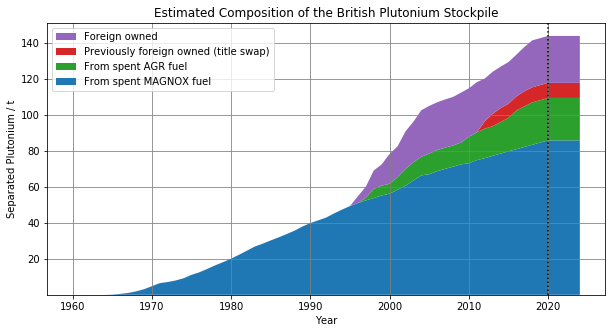

In [40]:
start = np.where(cumsp['year'] == 1960)[0][0]
end = np.where(cumsp['year'] == 2025)[0][0]

fig, ax = plt.subplots(figsize=(10,5))
ax.stackplot(cumsp['year'][start:end], 
             cumsp['magnox5000'][start:end],
             cumsp['agrfrom5000'][start:end],
             cumsp['ukfromforeign'][start:end], 
             cumsp['foreign'][start:end],
            labels = [labels['magnox'], labels['agr'], labels['swap'], labels['foreign']],
            colors = [colors['magnox'], colors['agr'], colors['swap'], colors['foreign']])
plt.title('Estimated Composition of the British Plutonium Stockpile')
plt.grid(b=True, which='both', color='0.5',linestyle='-')
plt.xlabel('Year')
plt.ylabel('Separated Plutonium / t')
plt.axvline(x=2020, color='black', linestyle=':')
handles, llabels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], llabels[::-1],loc=2)
plt.yticks([2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4], [20, 40, 60, 80, 100, 120, 140])
#plt.legend(loc=2)
plt.savefig("ukpu_stacked_5000.pdf")
plt.show()

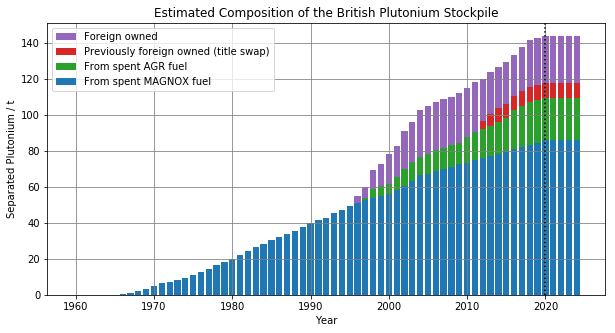

In [41]:
start = np.where(cumsp['year'] == 1960)[0][0]
end = np.where(cumsp['year'] == 2025)[0][0]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(cumsp['year'][start:end], cumsp['magnox5000'][start:end], label=labels['magnox'], color=colors['magnox'])
bottom = np.zeros(end - start) + cumsp['magnox5000'][start:end]
ax.bar(cumsp['year'][start:end], cumsp['agrfrom5000'][start:end], bottom=bottom, label=labels['agr'], color=colors['agr'])
bottom += cumsp['agrfrom5000'][start:end]
ax.bar(cumsp['year'][start:end], cumsp['ukfromforeign'][start:end], bottom=bottom, label=labels['swap'], color=colors['swap'])
bottom += cumsp['ukfromforeign'][start:end]
ax.bar(cumsp['year'][start:end], cumsp['foreign'][start:end], bottom=bottom, label=labels['foreign'], color=colors['foreign'])

plt.title('Estimated Composition of the British Plutonium Stockpile')
plt.grid(b=True, which='both', color='0.5',linestyle='-')
plt.xlabel('Year')
plt.ylabel('Separated Plutonium / t')
plt.axvline(x=2020, color='black', linestyle=':')
handles, llabels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], llabels[::-1],loc=2)
plt.yticks([0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4], [0, 20, 40, 60, 80, 100, 120, 140])
#plt.legend(loc=2)
plt.savefig("ukpu_stacked_bar_5000.pdf")
plt.show()

#### Plot in Grayscale - FIGURE 1 in journal article

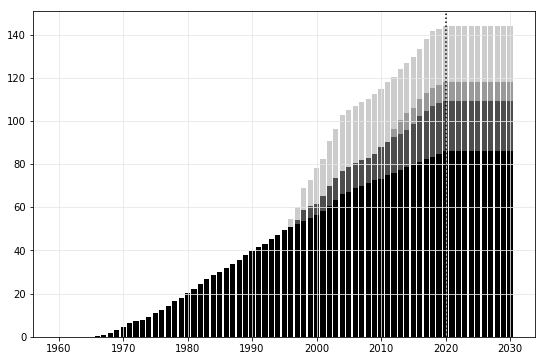

In [42]:
start = np.where(cumsp['year'] == 1960)[0][0]
end = np.where(cumsp['year'] == 2031)[0][0]


fig, ax = plt.subplots(figsize=(9,6))

ax.bar(cumsp['year'][start:end], cumsp['magnox5000'][start:end], label=labels['magnox'], color="0")
bottom = np.zeros(end - start) + cumsp['magnox5000'][start:end]

ax.bar(cumsp['year'][start:end], cumsp['agrfrom5000'][start:end], bottom=bottom, label=labels['agr'], color="0.3")
bottom += cumsp['agrfrom5000'][start:end]

ax.bar(cumsp['year'][start:end], cumsp['ukfromforeign'][start:end], bottom=bottom, label=labels['swap'], color="0.6")
bottom += cumsp['ukfromforeign'][start:end]

ax.bar(cumsp['year'][start:end], cumsp['foreign'][start:end], bottom=bottom, label=labels['foreign'], color="0.8")

#plt.title('Estimated Composition of the British Plutonium Stockpile')
plt.grid(b=True, which='both', color='0.9',linestyle='-')
#plt.xlabel('Year')
#plt.ylabel('Separated Plutonium / t')
plt.axvline(x=2020, color='black', linestyle=':')

#plt.axvline(x=2050, color='black', linestyle='') # only for creating space for labeling

handles, llabels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], llabels[::-1],loc=2)
plt.yticks([0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4], [0, 20, 40, 60, 80, 100, 120, 140])
#plt.legend(loc=2)
plt.savefig("ukpu_stacked_bar_5000_gray.svg")
plt.show()

(Figure has been manually edited for publication - legend, font for axis)

#### Different parts of UK plutonium stockpile (4000 MWd/tHM case)

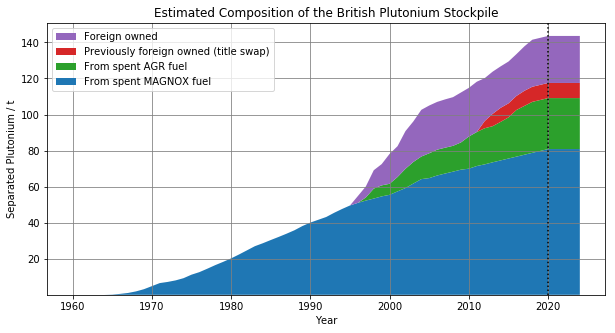

In [43]:
start = np.where(cumsp['year'] == 1960)[0][0]
end = np.where(cumsp['year'] == 2025)[0][0]

fig, ax = plt.subplots(figsize=(10,5))
ax.stackplot(cumsp['year'][start:end], 
             cumsp['magnox4000'][start:end],
             cumsp['agrfrom4000'][start:end],
             cumsp['ukfromforeign'][start:end], 
             cumsp['foreign'][start:end],
            labels = [labels['magnox'], labels['agr'], labels['swap'], labels['foreign']],
            colors = [colors['magnox'], colors['agr'], colors['swap'], colors['foreign']])
plt.title('Estimated Composition of the British Plutonium Stockpile')
plt.grid(b=True, which='both', color='0.5',linestyle='-')
plt.xlabel('Year')
plt.ylabel('Separated Plutonium / t')
plt.axvline(x=2020, color='black', linestyle=':')
handles, llabels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], llabels[::-1],loc=2)
plt.yticks([2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4], [20, 40, 60, 80, 100, 120, 140])
#plt.legend(loc=2)
plt.savefig("ukpu_stacked_4000.pdf")
plt.show()

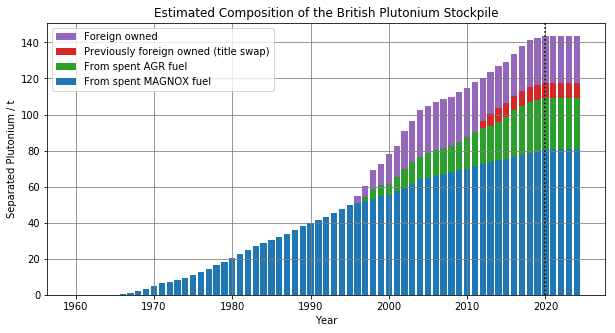

In [44]:
start = np.where(cumsp['year'] == 1960)[0][0]
end = np.where(cumsp['year'] == 2025)[0][0]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(cumsp['year'][start:end], cumsp['magnox4000'][start:end], label=labels['magnox'], color=colors['magnox'])
bottom = np.zeros(end - start) + cumsp['magnox4000'][start:end]
ax.bar(cumsp['year'][start:end], cumsp['agrfrom4000'][start:end], bottom=bottom, label=labels['agr'], color=colors['agr'])
bottom += cumsp['agrfrom4000'][start:end]
ax.bar(cumsp['year'][start:end], cumsp['ukfromforeign'][start:end], bottom=bottom, label=labels['swap'], color=colors['swap'])
bottom += cumsp['ukfromforeign'][start:end]
ax.bar(cumsp['year'][start:end], cumsp['foreign'][start:end], bottom=bottom, label=labels['foreign'], color=colors['foreign'])

plt.title('Estimated Composition of the British Plutonium Stockpile')
plt.grid(b=True, which='both', color='0.5',linestyle='-')
plt.xlabel('Year')
plt.ylabel('Separated Plutonium / t')
plt.axvline(x=2020, color='black', linestyle=':')
handles, llabels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], llabels[::-1],loc=2)
plt.yticks([0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4], [0, 20, 40, 60, 80, 100, 120, 140])
#plt.legend(loc=2)
plt.savefig("ukpu_stacked_bar_4000.pdf")
plt.show()

### Different parts of UK plutonium stockpile (4000 / 5000 combined)

Calculate helper values for stacked plot (difference between 4000 / 5000 MWd/tHM case)

In [45]:
helper = []
for y in range(startyear + 1, endyear + 1):
    yearidx = np.where(cumsp['year'] == y)[0][0]
    helper.append(cumsp['magnox5000'][yearidx] - cumsp['magnox4000'][yearidx])

Plot

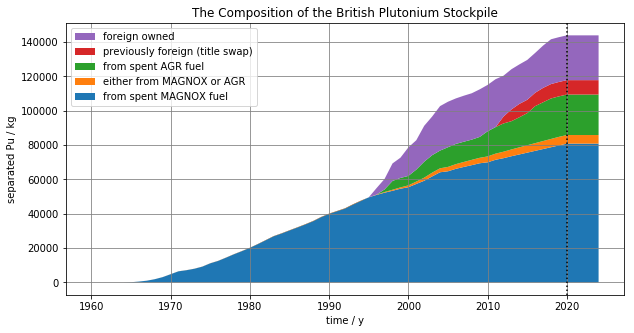

In [46]:
start = np.where(cumsp['year'] == 1960)[0][0]
end = np.where(cumsp['year'] == 2025)[0][0]

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax = plt.subplots(figsize=(10,5))
ax.stackplot(cumsp['year'][start:end], 
             cumsp['magnox4000'][start:end],
             helper[start:end],
             cumsp['agrfrom5000'][start:end],
             #cumsp['agrfrom4000'][start:end], 
             cumsp['ukfromforeign'][start:end], 
             cumsp['foreign'][start:end],
            labels = ["from spent MAGNOX fuel", 
                      "either from MAGNOX or AGR", 
                      "from spent AGR fuel", 
                      "previously foreign (title swap)", 
                      "foreign owned"],
            colors=[colors[0], colors[1], colors[2], colors[3], colors[4]])
plt.title('The Composition of the British Plutonium Stockpile')
plt.grid(b=True, which='both', color='0.5',linestyle='-')
plt.xlabel('time / y')
plt.ylabel('separated Pu / kg')
plt.axvline(x=2020, color='black', linestyle=':')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc=2)
#plt.legend(loc=2)
plt.savefig("ukpu_stacked_combined.pdf")
plt.show()


### Total Amount of the British Separated Plutonium Stockpile

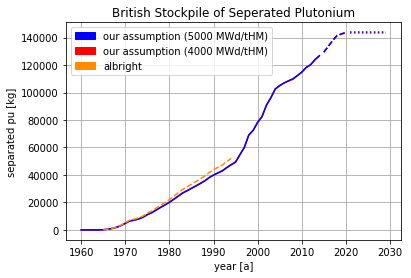

In [47]:
time = list(range(1960,2101))
pu_total_5000 = list(range(1960,2101))
pu_total_4000 = list(range(1960,2101))

for i in list(range(141)):
    pu_total_5000[i] = cumsp['magnox5000'][i] + cumsp['agrfrom5000'][i] + cumsp['ukfromforeign'][i] + cumsp['foreign'][i]
    pu_total_4000[i] = cumsp['magnox4000'][i] + cumsp['agrfrom4000'][i] + cumsp['ukfromforeign'][i] + cumsp['foreign'][i]

time1 = time[0:55]
pu_total_5000_1 = pu_total_5000[0:55]     
pu_total_4000_1 = pu_total_4000[0:55]     

time2 = time[55:61]
pu_total_5000_2 = pu_total_5000[55:61]     
pu_total_4000_2 = pu_total_4000[55:61]     

time3 = time[61:70]
pu_total_5000_3 = pu_total_5000[61:70]     
pu_total_4000_3 = pu_total_4000[61:70]     

time4 = time[5:35]
pu_albright = 30*[0]

for i in list(range(30)):
    pu_albright[i] = pu_albright[i-1] + albright205[i][1]
    
plt.title('British Stockpile of Seperated Plutonium')
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.plot(time1, pu_total_4000_1, '-', color='red')
plt.plot(time2, pu_total_4000_2, '--', color='red')
plt.plot(time3, pu_total_4000_3, ':', color='red')
plt.plot(time1, pu_total_5000_1, '-', color='blue')
plt.plot(time2, pu_total_5000_2, '--', color='blue')
plt.plot(time3, pu_total_5000_3, ':', color='blue')

plt.plot(time4, pu_albright, '--', color='darkorange')
plt.xlabel('year [a]')
plt.ylabel('separated pu [kg]')
blue_patch = mpatches.Patch(color='blue', label='our assumption (5000 MWd/tHM)')
red_patch = mpatches.Patch(color='red', label='our assumption (4000 MWd/tHM)')
orange_patch = mpatches.Patch(color='darkorange', label='albright')

plt.legend(handles=[blue_patch, red_patch, orange_patch], loc=2)
plt.show()

In [48]:
idx = np.where(cumsp['year'] == 2020)[0][0]
print(cumsp[idx])
idx = np.where(cumsp['year'] == 2030)[0][0]
print(cumsp[idx])


(2020, 85845.84733034, 80842.64649699, 23574.00268146, 28273.15002364, 8390., 26083.13810557)
(2030, 85845.84733034, 80842.64649699, 23574.00268146, 28273.15002364, 8390., 26083.13810557)


===================================================================================================================

## Calculating Plutonium Isotopics
This section works only when PyNE is available. PyNE (http://www.pyne.io) is a Python Toolkit for Nuclear Engineering. 

In [54]:
import warnings
from pyne.utils import QAWarning
warnings.filterwarnings("ignore", category=QAWarning)

from pyne import nucname
from pyne.material import Material
from pyne.transmute.chainsolve import Transmuter

Calculations take a while, so it is nice to have a progressbar. This is one from https://gist.github.com/minrk/2211026

In [55]:
import sys, time
try:
    from IPython.core.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False

class ProgressBar:
    def __init__(self, iterations):
        self.iterations = iterations
        self.prog_bar = '[]'
        self.fill_char = '*'
        self.width = 40
        self.__update_amount(0)
        if have_ipython:
            self.animate = self.animate_ipython
        else:
            self.animate = self.animate_noipython

    def animate_ipython(self, iter):
        try:
            clear_output()
        except Exception:
            # terminal IPython has no clear_output
            pass
        print '\r', self,
        sys.stdout.flush()
        self.update_iteration(iter + 1)

    def update_iteration(self, elapsed_iter):
        self.__update_amount((elapsed_iter / float(self.iterations)) * 100.0)
        self.prog_bar += '  %d of %s complete' % (elapsed_iter, self.iterations)

    def __update_amount(self, new_amount):
        percent_done = int(round((new_amount / 100.0) * 100.0))
        all_full = self.width - 2
        num_hashes = int(round((percent_done / 100.0) * all_full))
        self.prog_bar = '[' + self.fill_char * num_hashes + ' ' * (all_full - num_hashes) + ']'
        pct_place = (len(self.prog_bar) / 2) - len(str(percent_done))
        pct_string = '%d%%' % percent_done
        self.prog_bar = self.prog_bar[0:pct_place] + \
            (pct_string + self.prog_bar[pct_place + len(pct_string):])

    def __str__(self):
        return str(self.prog_bar)



In [56]:
# Isotopic Vectors
# Different isotopic vectors of plutonium
# (ordered as 94238, 94239, 94240, 94241, 94242, 95241)

# Isotopelist
isotopes   = ['942380', '942390', '942400', '942410', '942420', '952410']
# From NATO paper / World Nuclear Association
magnox3000 = [0.1, 80,   16.9, 2.7, 0.3, 0]
magnox5000 = [0,   68.5, 25,   5.3, 1.2, 0]
agr        = [0.6, 53.7, 30.8, 9.9, 5,   0]

Isotopic Vector for 4 MWD/kgHM case linearly interpolated.

In [57]:
magnox4000 = []
for i in range(len(magnox3000)):
    magnox4000.append((magnox3000[i] + magnox5000[i])/2)
magnox4000

[0.05, 74.25, 20.95, 4.0, 0.75, 0]

In [58]:
startmat = Material({isotope: magnox5000[isotopeidx] for isotopeidx, isotope in enumerate(isotopes)})
magnoxmaterials = {startyear: startmat}
magnoxmaterials[startyear].mass = difsp['magnox5000'][0]
magnoxmaterials4000 = {startyear: startmat}
magnoxmaterials4000[startyear].mass = difsp['magnox4000'][0]

p = ProgressBar(years)    
for y in range(startyear + 1, endyear + 1):
    p.animate(y - startyear)
    yearidx = np.where(difsp['year'] == y)[0][0] #same index as cumsp
    if(y in albright205['year']):
        yearidx2 = np.where(albright205['year'] == y)[0][0]
        if albright205['avg-burnup'][yearidx2] > 4000:
            puvec = magnox5000
        else:
            puvec = magnox3000
        puvec4000 = puvec
    else:
        puvec = magnox5000
        puvec4000 = magnox4000
        
    t = 365 * 24 * 3600 # one year in seconds
    premass = magnoxmaterials[y-1].mass
    totmass = difsp['magnox5000'][yearidx] + premass
    premass4000 = magnoxmaterials4000[y-1].mass
    totmass4000 = difsp['magnox4000'][yearidx] + premass4000
    mat = magnoxmaterials[y - 1]
    mat4000 = magnoxmaterials4000[y - 1]
    if premass != 0:
        tm = Transmuter(phi=0, tol=1e-7)
        premat = tm.transmute(mat, t)
        del tm
    else: 
        premat = mat
    if premass4000 != 0:
        tm = Transmuter(phi=0, tol=1e-7)
        premat4000 = tm.transmute(mat4000, t)
        del tm
    else: 
        premat4000 = mat4000    
    if totmass != 0:
        newmat = Material({isotope: puvec[isotopeidx] for isotopeidx, isotope in enumerate(isotopes)})
        newmat.mass = difsp['magnox5000'][yearidx]
        magnoxmaterials[y] = premat + newmat
    else:
        magnoxmaterials[y] = premat
    if totmass4000 != 0:
        newmat4000 = Material({isotope: puvec4000[isotopeidx] for isotopeidx, isotope in enumerate(isotopes)})
        newmat4000.mass = difsp['magnox4000'][yearidx]
        magnoxmaterials4000[y] = premat4000 + newmat4000
    else:
        magnoxmaterials4000[y] = premat4000    
            

[*****************99%******************]  140 of 141 complete


In [60]:
magnox2030=magnoxmaterials[2030]
for i in magnox2030:
    if magnox2030[i]/magnox2030.mass < 1e-5:
        magnox2030=magnox2030.del_mat([i])
print(magnox2030)
print(magnoxmaterials[2030].mass, magnox2030.mass, (magnoxmaterials[2030].mass - magnox2030.mass)/magnoxmaterials[2030].mass)

Material:
mass = 85841.3442193
density = -1.0
atoms per molecule = -1.0
-------------------------
U234   9.66802167872e-05
U235   0.000767651091603
U236   0.000834302577038
Np237  0.00130787489072
Pu238  0.000199141295459
Pu239  0.718465990935
Pu240  0.225068342594
Pu241  0.010431323429
Pu242  0.00932269215141
Am241  0.033506000819
(85841.39316144233, 85841.34421925948, 5.701466512933507e-07)


In [61]:
magnox2030_4000=magnoxmaterials4000[2030]
for i in magnox2030_4000:
    if magnox2030_4000[i]/magnox2030_4000.mass < 1e-5:
        magnox2030_4000=magnox2030_4000.del_mat([i])
print(magnox2030_4000)

Material:
mass = 80838.3980791
density = -1.0
atoms per molecule = -1.0
-------------------------
U234   0.000134506859906
U235   0.000803787189477
U236   0.000812975084748
Np237  0.00126888246733
Pu238  0.000374194021165
Pu239  0.742985132516
Pu240  0.207794212004
Pu241  0.00813057770748
Pu242  0.00740100266918
Am241  0.0302947294808


In [62]:
startmat = Material({isotope: agr[isotopeidx] for isotopeidx, isotope in enumerate(isotopes)})
agrmaterials = {startyear: startmat}
agrmaterials[startyear].mass = difsp['agrfrom5000'][0]
agrmaterials4000 = {startyear: startmat}
agrmaterials4000[startyear].mass = difsp['agrfrom4000'][0]

p = ProgressBar(years)    
for y in range(startyear + 1, endyear + 1):
    p.animate(y - startyear)
    yearidx = np.where(difsp['year'] == y)[0][0] #same index as cumsp
    puvec = agr
        
    t = 365 * 24 * 3600 # one year in seconds
    premass = agrmaterials[y-1].mass
    totmass = difsp['agrfrom5000'][yearidx] + premass
    premass4000 = agrmaterials4000[y-1].mass
    totmass4000 = difsp['agrfrom4000'][yearidx] + premass4000
    mat = agrmaterials[y - 1]
    mat4000 = agrmaterials4000[y - 1]
    if premass != 0:
        tm = Transmuter(phi=0, tol=1e-7)
        premat = tm.transmute(mat, t)
        del tm
    else: 
        premat = mat
    if premass4000 != 0:
        tm = Transmuter(phi=0, tol=1e-7)
        premat4000 = tm.transmute(mat4000, t)
        del tm
    else: 
        premat4000 = mat4000    
    if totmass != 0:
        newmat = Material({isotope: puvec[isotopeidx] for isotopeidx, isotope in enumerate(isotopes)})
        newmat.mass = difsp['agrfrom5000'][yearidx]
        agrmaterials[y] = premat + newmat
    else:
        agrmaterials[y] = premat
    if totmass4000 != 0:
        newmat4000 = Material({isotope: puvec[isotopeidx] for isotopeidx, isotope in enumerate(isotopes)})
        newmat4000.mass = difsp['agrfrom4000'][yearidx]
        agrmaterials4000[y] = premat4000 + newmat4000
    else:
        agrmaterials4000[y] = premat4000    

[*****************99%******************]  140 of 141 complete


In [63]:
agr2030=agrmaterials[2030]
for i in agr2030:
    if agr2030[i]/agr2030.mass < 1e-5:
        agr2030=agr2030.del_mat([i])
print(agr2030)
print(agrmaterials[2030].mass, agr2030.mass, (agrmaterials[2030].mass - agr2030.mass)/agrmaterials[2030].mass)

Material:
mass = 23572.5127479
density = -1.0
atoms per molecule = -1.0
-------------------------
U234   0.000967618171442
U235   0.00034714636782
U236   0.000731015613885
Np237  0.00145428700846
Pu238  0.00501615192876
Pu239  0.536680875531
Pu240  0.307276038397
Pu241  0.0347930815234
Pu242  0.0500010460275
Am241  0.0627327394311
(23572.56262512676, 23572.5127479394, 2.115900089185428e-06)


In [64]:
if not os.path.exists('stockpilematerials'):
    os.mkdir('stockpilematerials')
for year in magnoxmaterials:
    magnoxmaterials[year].write_text('stockpilematerials/magnox-{:04d}.txt'.format(year))
for year in magnoxmaterials4000:
    magnoxmaterials4000[year].write_text('stockpilematerials/magnox4000-{:04d}.txt'.format(year))
for year in agrmaterials:
    agrmaterials[year].write_text('stockpilematerials/agr-{:04d}.txt'.format(year))
for year in agrmaterials4000:
    agrmaterials4000[year].write_text('stockpilematerials/agr4000-{:04d}.txt'.format(year))    

## Output Isotope Data

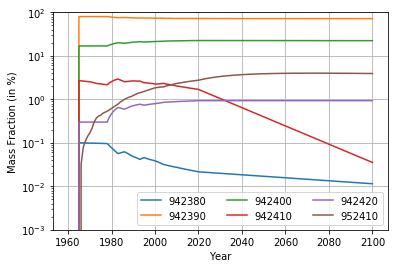

In [65]:
start = 1960
end = 2100

for iso in isotopes:
    isolist = []
    for j in range(start, end + 1):
        if(magnoxmaterials[j].mass == 0):
            isolist.append(0)
        else:
            isolist.append(magnoxmaterials[j][iso] / magnoxmaterials[j].mass * 100)
    plt.semilogy(range(start, end + 1), isolist, label=iso)
plt.legend(ncol=3, loc=4)
plt.grid()
plt.xlabel("Year")
plt.ylim(1e-3,1e2)
plt.ylabel("Mass Fraction (in %)")
plt.savefig("magnoxvector.pdf")
plt.show()

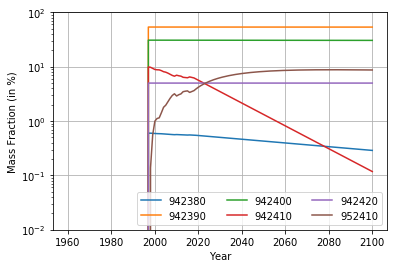

In [66]:
start = 1960
end = 2100

for iso in isotopes:
    isolist = []
    for j in range(start, end + 1):
        if(agrmaterials[j].mass == 0):
            isolist.append(0)
        else:
            isolist.append(agrmaterials[j][iso] / agrmaterials[j].mass * 100)
    plt.semilogy(range(start, end + 1), isolist, label=iso)
plt.legend(ncol=3, loc=4)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Mass Fraction (in %)")
plt.ylim(1e-2, 1e2)
plt.savefig("agrvector.pdf")
plt.show()

In [67]:
oyears = [2000, 2010, 2020, 2030, 2050, 2100]
mf = open('magnoxisotable.csv', 'w')
for year in oyears:
    l = [year]
    for i in isotopes:
        l.append(magnoxmaterials[year][i] / magnoxmaterials[year].mass * 100)
    l.append(magnoxmaterials[year].mass)
    mf.write("{0[0]:d} & {0[1]:2.2f} & {0[2]:2.2f} & {0[3]:2.2f} & {0[4]:2.2f} & {0[5]:2.2f} & {0[6]:2.2f} & {0[7]:2.1f} \\\\\n".format(tuple(l)))
mf.close()
mf4000 = open('magnox4000isotable.csv', 'w')
for year in oyears:
    l = [year]
    for i in isotopes:
        l.append(magnoxmaterials4000[year][i] / magnoxmaterials4000[year].mass * 100)
    l.append(magnoxmaterials4000[year].mass)
    mf4000.write("{0[0]:d} & {0[1]:2.2f} & {0[2]:2.2f} & {0[3]:2.2f} & {0[4]:2.2f} & {0[5]:2.2f} & {0[6]:2.2f} & {0[7]:2.1f} \\\\\n".format(tuple(l)))
mf4000.close()

In [68]:
oyears = [2000, 2010, 2020, 2030, 2050, 2100]
mf = open('agrisotable.csv', 'w')
for year in oyears:
    l = [year]
    for i in isotopes:
        l.append(agrmaterials[year][i] / agrmaterials[year].mass * 100)
    l.append(agrmaterials[year].mass)
    mf.write("{0[0]:d} & {0[1]:2.2f} & {0[2]:2.2f} & {0[3]:2.2f} & {0[4]:2.2f} & {0[5]:2.2f} & {0[6]:2.2f} & {0[7]:2.1f} \\\\\n".format(tuple(l)))
mf.close()
mf4000 = open('agr4000isotable.csv', 'w')
for year in oyears:
    l = [year]
    for i in isotopes:
        l.append(agrmaterials4000[year][i] / agrmaterials4000[year].mass * 100)
    l.append(agrmaterials4000[year].mass)
    mf4000.write("{0[0]:d} & {0[1]:2.2f} & {0[2]:2.2f} & {0[3]:2.2f} & {0[4]:2.2f} & {0[5]:2.2f} & {0[6]:2.2f} & {0[7]:2.1f} \\\\\n".format(tuple(l)))
mf4000.close()

## Some Checks

Check if total stockpile in 2016 is as declared according to INFCIRC549 values.

In [69]:
i = np.where(cumsp['year'] == 2016)[0][0]
res2016 = cumsp['magnox5000'][i] + cumsp['agrfrom5000'][i] + cumsp['ukfromforeign'][i] + cumsp['foreign'][i]
inf2016 = infcirc549['repro'][-1] + infcirc549['fabrication'][-1] + infcirc549['inmox'][-1] + infcirc549['elsewhere'][-1]
print("Result for end of 2016:     {:f} kg".format(res2016))
print("INFCIRC549 for end of 2016: {:f} kg".format(inf2016 * 1000))

Result for end of 2016:     133500.000000 kg
INFCIRC549 for end of 2016: 133500.000000 kg


Check if difference between 5MWd/kg HM and 4MWd/kg HM case match for 2016 (they should) and differ not by far after (allowed, because after 2016 AGR and MAGNOX are independently calculated)

In [70]:
for y in range(2016,2021):
    yearidx = np.where(cumsp['year'] == y)[0][0]
    mdif = sum(difsp['magnox5000'][:yearidx+1]) - sum(difsp['magnox4000'][:yearidx+1])
    adif = sum(difsp['agrfrom5000'][:yearidx+1]) - sum(difsp['agrfrom4000'][:yearidx+1])
    print(y, mdif, adif)

(2016, 4299.175815376817, -4299.175815376861)
(2017, 4475.182069869174, -4499.161578781954)
(2018, 4651.18832436153, -4699.147342187047)
(2019, 4827.194578853887, -4699.147342187047)
(2020, 5003.200833346244, -4699.147342187047)
